In [1]:
# download on https://bcsiriuschen.github.io/CARC/

In [2]:
import pandas as pd

from pathlib import Path

In [3]:
def read_dataset(dataset_dir):
    current_path = Path('.')
    dataset_path = Path(dataset_dir)
    dataset = []
    for file in dataset_path.glob('**/*'):
        if file.suffix != '.jpg':
            print(f'File with extension different than .jpg. File extension found: {file.suffix}')
        else:
            filename = file.stem
            attributes = filename.split('_')
            data = {
                'person_name': '_'.join(attributes[1:-1]),
                'picture_per_person_id': int(attributes[-1]),
                'age': int(attributes[0]),
                'filepath': str(file.relative_to(current_path))
            }
            dataset.append(data)
    return dataset

In [4]:
dataset_data = read_dataset('../datasets/cacd/CACD2000')

In [5]:
df = pd.DataFrame(dataset_data)

df.head()

,person_name,picture_per_person_id,age,filepath
0,Tony_Danza,10,61,../datasets/cacd/CACD2000/61_Tony_Danza_0010.jpg
1,Frances_Fisher,1,54,../datasets/cacd/CACD2000/54_Frances_Fisher_00...
2,Alfre_Woodard,6,60,../datasets/cacd/CACD2000/60_Alfre_Woodard_000...
3,Lorna_Luft,6,57,../datasets/cacd/CACD2000/57_Lorna_Luft_0006.jpg
4,Isabelle_Huppert,7,60,../datasets/cacd/CACD2000/60_Isabelle_Huppert_...


<AxesSubplot:>

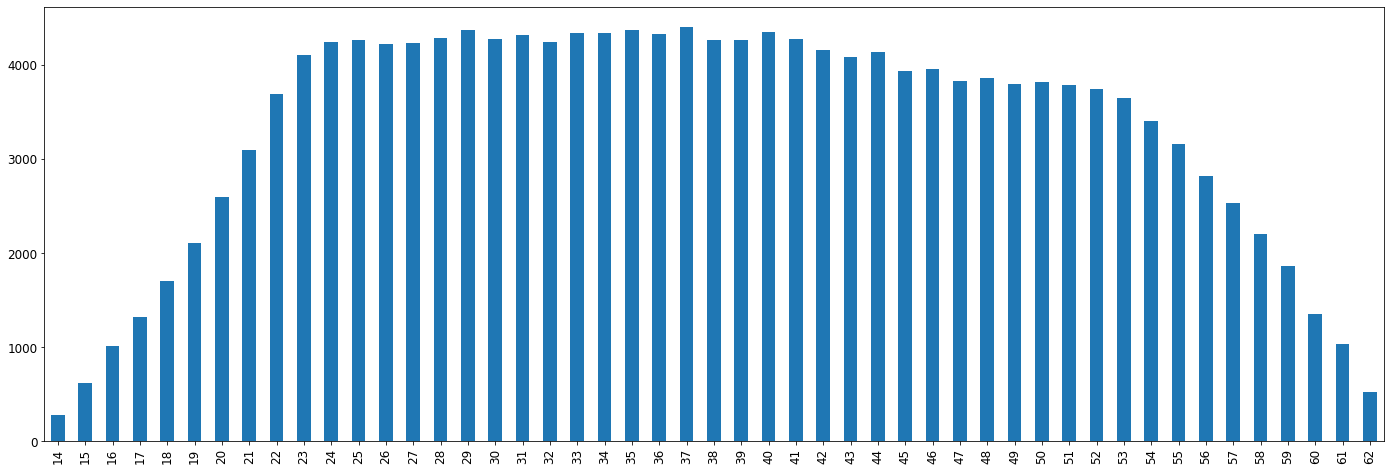

In [6]:
df['age'].value_counts().sort_index().plot(kind='bar', fontsize=12, figsize=(24,8))

In [7]:
total_cnt, minor_cnt = 0, 0

for age, count in df['age'].value_counts().items():
    if age < 18:
        minor_cnt += count
    total_cnt += count
    
minor_p = minor_cnt/total_cnt

In [8]:
print(f'Percentile of minors: \t {minor_p * 100 : .2f}%')

Percentile of minors: 	  1.98%
